1. (0.5 pt.) Caricare in un dataframe le informazioni presenti nel foglio ‘customers’ del file BikeStores
presenta al link

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true","customers")
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


2. (1 pt.) Visualizzare i nominativi dei clienti di cui non si conosce né il numero di telefono né la mail

In [ ]:
df[(df["phone"].isnull()) & (df["email"].isnull())]["first_name"]

180    Olevia
184    Morton
238    Felice
239        Le
Name: first_name, dtype: object

3. (1 pt.) Visualizzare l’indirizzo dei clienti che usano gmail come propria mail personale

In [ ]:
df[df["email"].str.contains("gmail",na=False)]["street"]

9             476 Chestnut Ave. 
14      314 South Columbia Ave. 
20          10 Silver Spear Dr. 
21        683 West Kirkland Dr. 
24         44 Stonybrook Street 
                  ...           
1428           8396 Brook Drive 
1441        947 Lafayette Drive 
1442      401 Brandywine Street 
1443      88 N. Canterbury Ave. 
1444            671 Miles Court 
Name: street, Length: 304, dtype: object

4. (0.5 pt.) Eliminare la colonna customer_id dal dataframe

In [ ]:
df = df.drop(columns="customer_id")
df

,first_name,last_name,phone,email,street,city,state,zip_code
0,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...
1440,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


5. (1.5 pt) Calcolare il numero di clienti per ogni stato e visualizzare queste informazioni in un pie chart.
Dare un nome appropriato al titolo del grafico

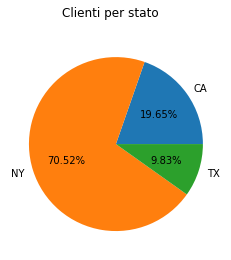

In [ ]:
df2 = df.groupby("state")["first_name"].count()
fig = plt.figure()
ax = plt.axes()
ax.pie(df2.values,labels=df2.index, autopct="%1.2f%%")
fig.suptitle("Clienti per stato")
plt.show()

6. (1.5 pt) Calcolare il numero di clienti di ogni città. Visualizzare il nome della città e il numero di clienti
che risiedono in quella città. Ordinare in ordine decrescente sul numero di clienti e visualizzare le
informazioni in un grafico a barre orizzontali. Dare un nome appropriato al titolo del grafico e agli assi

Text(0, 0.5, 'Città')

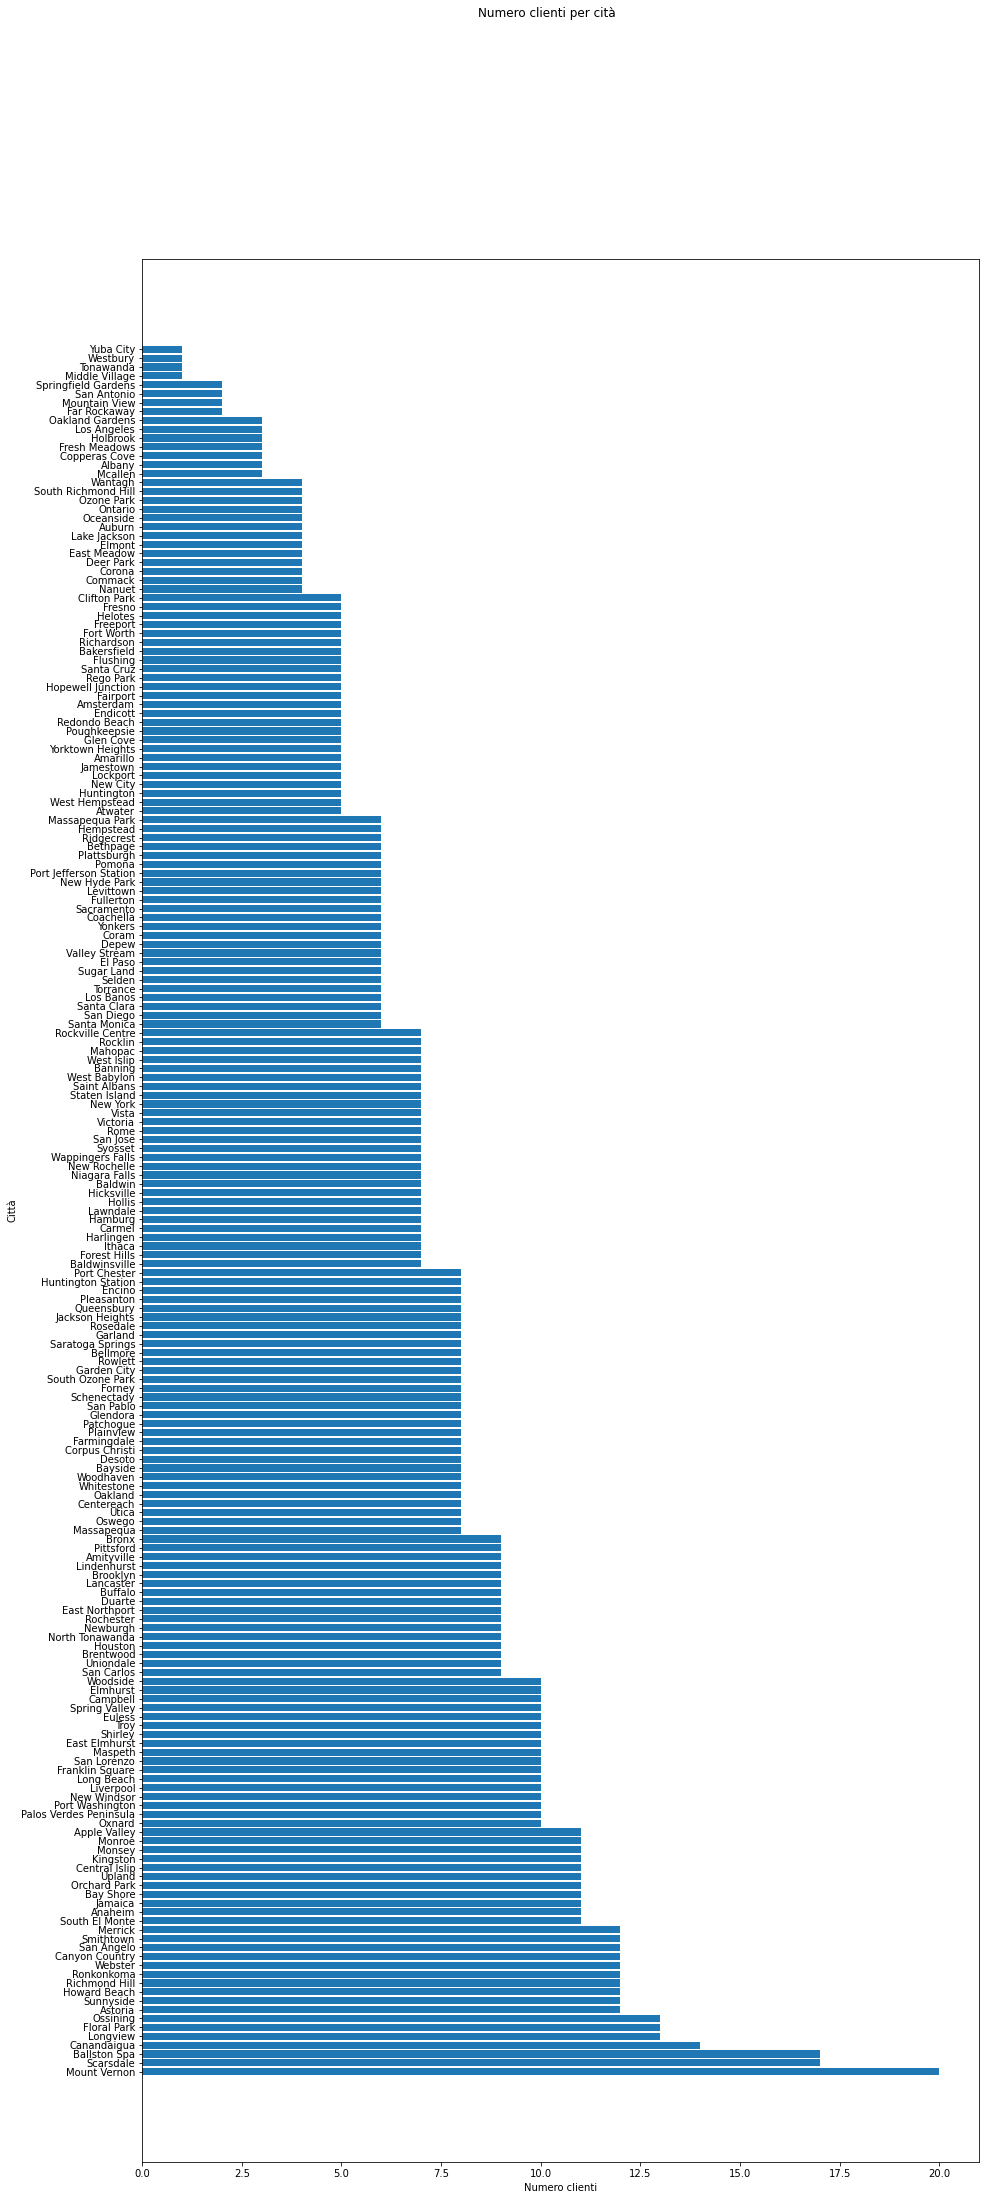

In [ ]:
df3 = df.groupby("city")["first_name"].count().sort_values(ascending=False)
fig = plt.figure(figsize=(15,35))
ax = plt.axes()
ax.barh(df3.index,df3.values)
fig.suptitle("Numero clienti per cità")
ax.set_xlabel("Numero clienti")
ax.set_ylabel("Città")

7. (1 pt.) Visualizzare le città che hanno un numero di clienti compreso tra 10 e 20. Visualizzare il nome
della città e il numero di clienti.

In [ ]:
df3[(df3.values >= 10) & (df3.values <=20)]

city
Mount Vernon              20
Scarsdale                 17
Ballston Spa              17
Canandaigua               14
Longview                  13
Floral Park               13
Ossining                  13
Astoria                   12
Sunnyside                 12
Howard Beach              12
Richmond Hill             12
Ronkonkoma                12
Webster                   12
Canyon Country            12
San Angelo                12
Smithtown                 12
Merrick                   12
South El Monte            11
Anaheim                   11
Jamaica                   11
Bay Shore                 11
Orchard Park              11
Upland                    11
Central Islip             11
Kingston                  11
Monsey                    11
Monroe                    11
Apple Valley              11
Oxnard                    10
Palos Verdes Peninsula    10
Port Washington           10
New Windsor               10
Liverpool                 10
Long Beach                10
Franklin 

8. (1 pt.) Calcolare il numero di città per ogni stato. Visualizzare il nome dello stato e il numero delle
città

In [ ]:
df.groupby("state")["city"].count()

state
CA     284
NY    1019
TX     142
Name: city, dtype: int64

9. (1 pt.) Eliminare dal dataframe tutti i clienti di Buffalo di cui non si conosce il telefono

In [ ]:
df = df.drop(df[(df["city"] == "Buffalo") & (df["phone"].isnull())].index)
df

,first_name,last_name,phone,email,street,city,state,zip_code
0,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...
1440,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0
